# Exact Diagonalization
Exact Diagonalization of Tensor Field Ising Models

In [17]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time

Simple Hamiltonian:
$$ H = - \sum_i z_i * z_{i + 1} $$

In [2]:
# Classical Model (Probably not helpful)
N = 10
states = 2**N
H = np.matrix(np.zeros((states, states)))

# Iterate over all spin configurations
for i in np.arange(states):
    zspins = np.array([1 if (i >> j) & 1 else -1 for j in range(N)])
    energy = - (np.dot(zspins[:-1], zspins[1:]) + zspins[0] * zspins[-1])
    H[i, i] = energy

H

matrix([[-10.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,  -6.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,  -6., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,  -6.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,  -6.,   0.],
        [  0.,   0.,   0., ...,   0.,   0., -10.]])

In [3]:
np.linalg.eig(H)

EigResult(eigenvalues=array([-10.,  -6.,  -6., ...,  -6.,  -6., -10.]), eigenvectors=matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]))

Hamiltonian: 
$$ H = - \sum_i \sigma_{zi} * \sigma_{zi+1} + g \sum_i \sigma_{xi} $$
First let $N = 10$ then try higher numbers of sites

In [4]:
# Helper function for Tensor Product
def tensor_product(tensors):
    prod = tensors[0]
    for tensor in tensors[1:]:
        prod = np.kron(prod, tensor)
    return prod

In [5]:
# Pauli Spin Matrices
sx = np.array([[0, 1], [1, 0]])
sz = np.array([[1, 0], [0, -1]])
I = np.eye(2)

# Construct Hamiltonian
g = 0
N = 3
states = 2**N
H = np.matrix(np.zeros((states, states)))

# Z-spin Term
for i in np.arange(N - 1):
    z_spin = [I for _ in np.arange(N)]
    z_spin[i] = sz
    z_spin[i + 1] = sz
    H += -tensor_product(z_spin)

# X-spin Term
for i in np.arange(N):
    x_spin = [I for _ in np.arange(N)]
    x_spin[i] = sx
    H -= g * tensor_product(x_spin)
    
H

matrix([[-2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -2.]])

In [6]:
# Pauli Spin Matrices
sx = np.array([[0, 1], [1, 0]])
sz = np.array([[1, 0], [0, -1]])
I = np.eye(2)

# Define a function that constructs H for different values of g
def ising_hamiltonian(g, N=10):
    # Construct Hamiltonian
    states = 2**N
    H = np.matrix(np.zeros((states, states)))
    
    # Z-spin Term
    for i in np.arange(N):
        z_spin = [I for _ in np.arange(N)]
        z_spin[i] = sz
        z_spin[(i + 1) % N] = sz
        H -= tensor_product(z_spin)
    
    # X-spin Term
    for i in np.arange(N):
        x_spin = [I for _ in np.arange(N)]
        x_spin[i] = sx
        H -= g * tensor_product(x_spin)
        
    return H

In [7]:
# Expectation value of Sx
def Sx(psi, N=10):
    states = 2**N
    S = np.matrix(np.zeros((states, states)))
    for i in np.arange(N):
        x_spin = [I for _ in np.arange(N)]
        x_spin[i] = sx
        S += tensor_product(x_spin)
    return np.real(psi.T @ S @ psi) / N

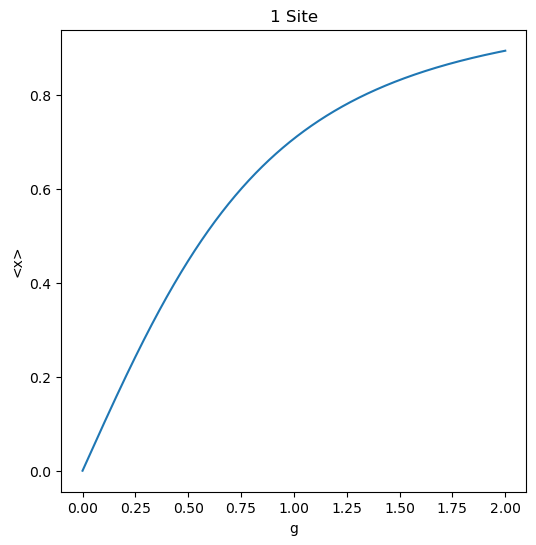

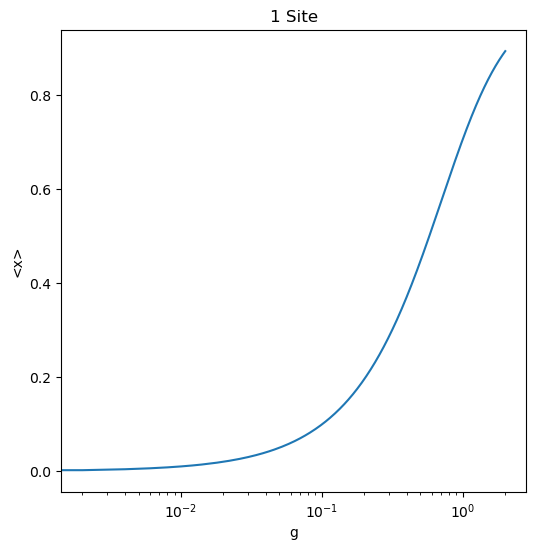

In [8]:
# Construct Hamiltonians for different values of g
gs = np.linspace(0, 2, 1000)

Sx_expectations = np.array([])
for g in gs:
    H = ising_hamiltonian(g, 1)
    evals, evecs = np.linalg.eigh(H)
    Sx_expectations = np.append(Sx_expectations, Sx(evecs[:, 0], 1))

plt.figure(figsize=(6, 6))
plt.plot(gs, Sx_expectations)
plt.title("1 Site")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()

plt.figure(figsize=(6, 6))
plt.semilogx(gs, Sx_expectations)
plt.title("1 Site")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()

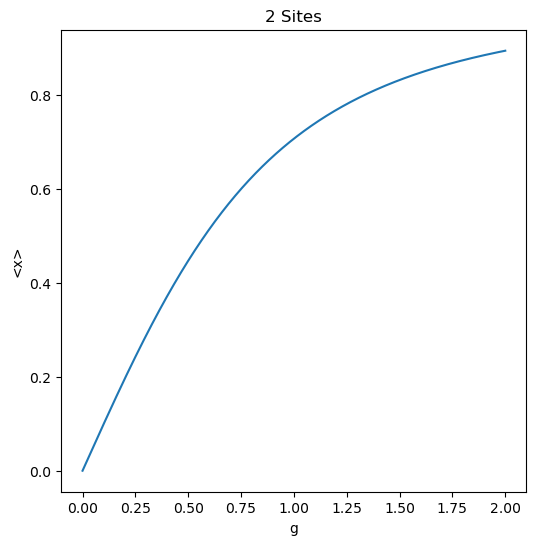

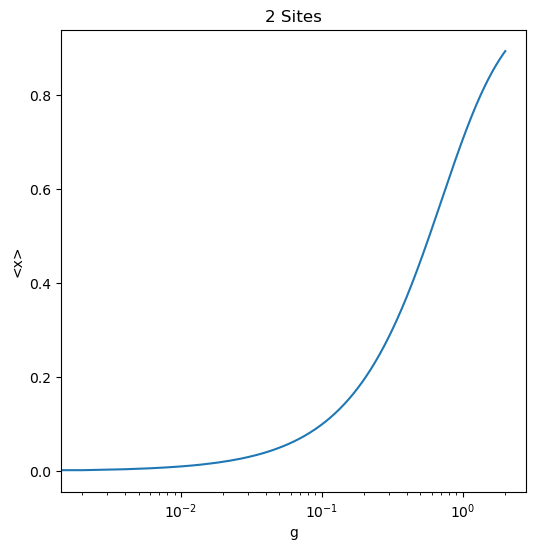

In [9]:
# Construct Hamiltonians for different values of g
gs = np.linspace(0, 2, 1000)

Sx_expectations = np.array([])
for g in gs:
    H = ising_hamiltonian(g, 2)
    evals, evecs = np.linalg.eigh(H)
    Sx_expectations = np.append(Sx_expectations, Sx(evecs[:, 0], 2))

plt.figure(figsize=(6, 6))
plt.plot(gs, Sx_expectations)
plt.title("2 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()

plt.figure(figsize=(6, 6))
plt.semilogx(gs, Sx_expectations)
plt.title("2 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()

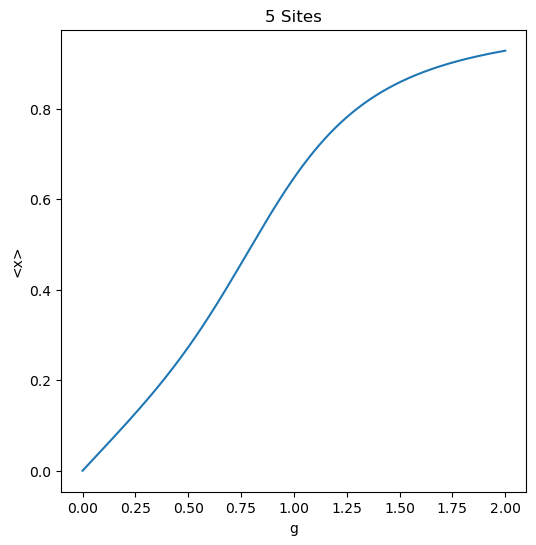

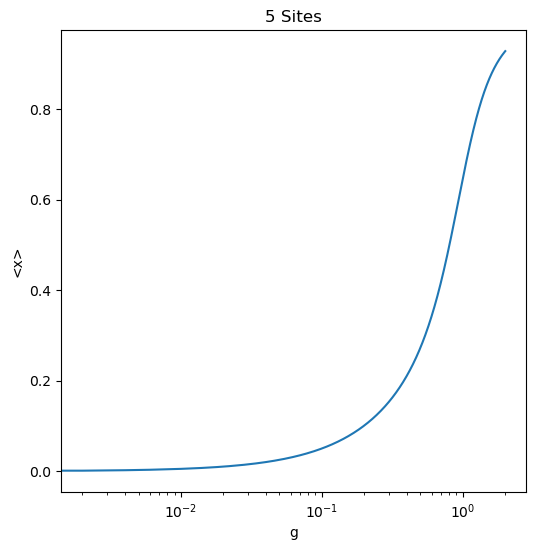

--- 0.774137020111084 seconds ---


In [19]:
# Construct Hamiltonians for different values of g
start_time = time.time()
gs = np.linspace(0, 2, 1000)

Sx_expectations = np.array([])
for g in gs:
    H = ising_hamiltonian(g, 5)
    evals, evecs = np.linalg.eigh(H)
    Sx_expectations = np.append(Sx_expectations, Sx(evecs[:, 0], 5))

plt.figure(figsize=(6, 6))
plt.plot(gs, Sx_expectations)
plt.title("5 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()

plt.figure(figsize=(6, 6))
plt.semilogx(gs, Sx_expectations)
plt.title("5 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

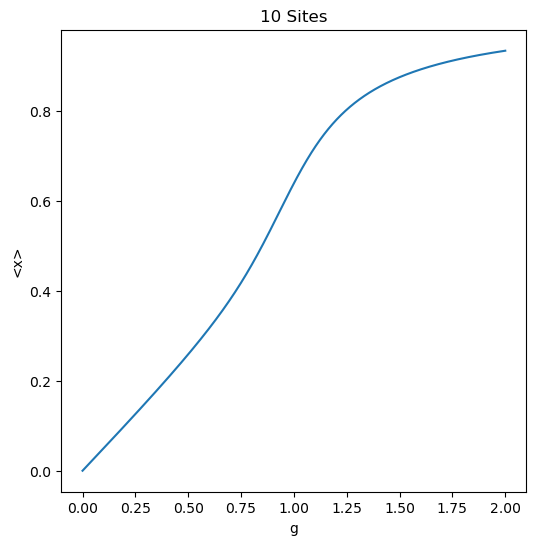

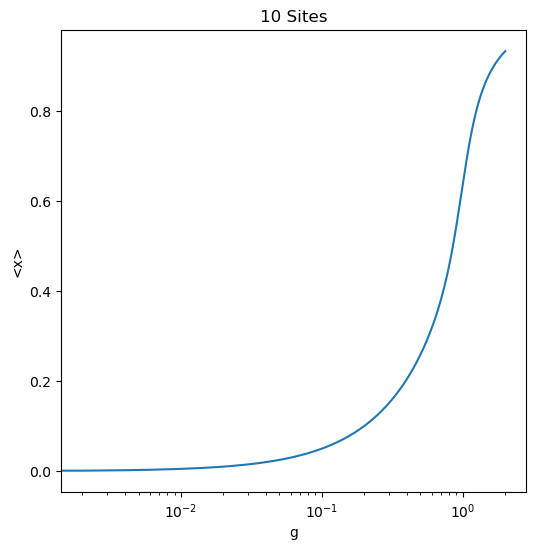

--- 335.69045305252075 seconds ---


In [20]:
# Construct Hamiltonians for different values of g
start_time = time.time()
gs = np.linspace(0, 2, 1000)

Sx_expectations = np.array([])
for g in gs:
    H = ising_hamiltonian(g, 10)
    evals, evecs = np.linalg.eigh(H)
    Sx_expectations = np.append(Sx_expectations, Sx(evecs[:, 0], 10))

plt.figure(figsize=(6, 6))
plt.plot(gs, Sx_expectations)
plt.title("10 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()

plt.figure(figsize=(6, 6))
plt.semilogx(gs, Sx_expectations)
plt.title("10 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

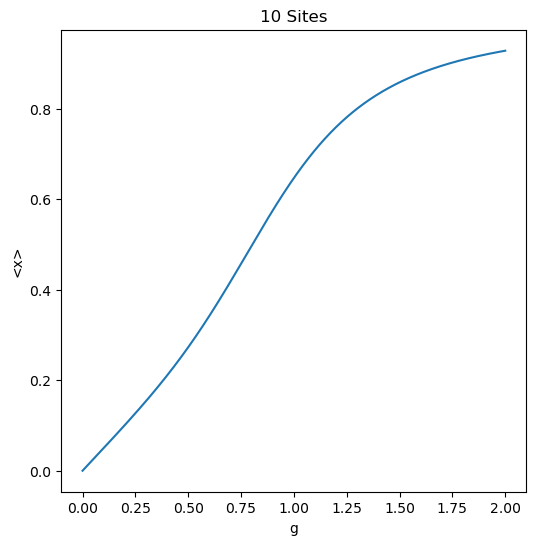

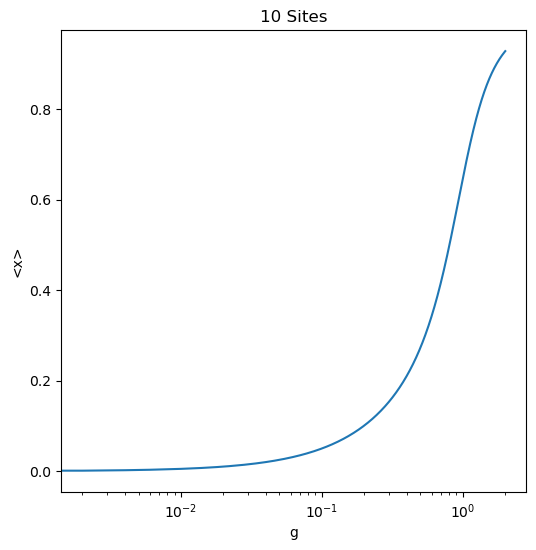

--- 0.7999417781829834 seconds ---


In [21]:
# Construct Hamiltonians for different values of g
start_time = time.time()
gs = np.linspace(0, 2, 1000)

Sx_expectations = np.array([])
for g in gs:
    H = ising_hamiltonian(g, 5)
    evals, evecs = sp.sparse.linalg.eigsh(H, k=1, which="SA")
    Sx_expectations = np.append(Sx_expectations, Sx(evecs[:, 0], 5))

plt.figure(figsize=(6, 6))
plt.plot(gs, Sx_expectations)
plt.title("10 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()

plt.figure(figsize=(6, 6))
plt.semilogx(gs, Sx_expectations)
plt.title("10 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

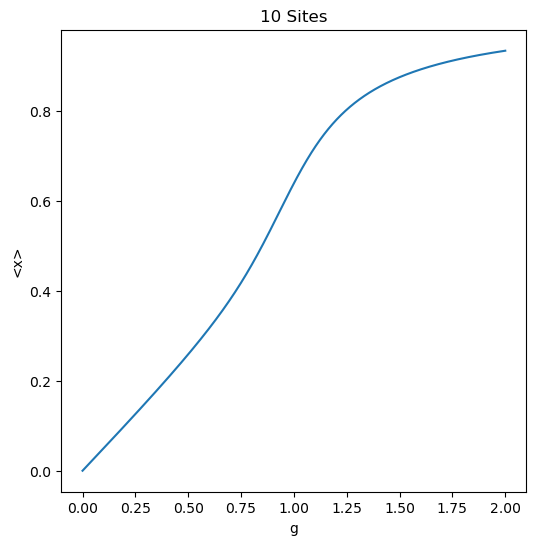

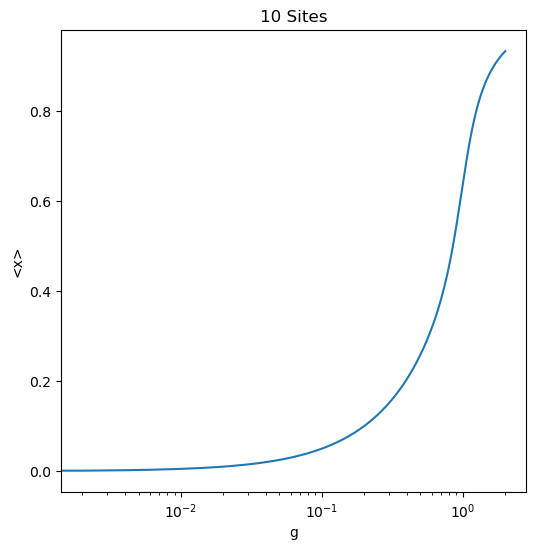

--- 235.32582211494446 seconds ---


In [22]:
# Construct Hamiltonians for different values of g
start_time = time.time()
gs = np.linspace(0, 2, 1000)

Sx_expectations = np.array([])
for g in gs:
    H = ising_hamiltonian(g, 10)
    evals, evecs = sp.sparse.linalg.eigsh(H, k=1, which="SA")
    Sx_expectations = np.append(Sx_expectations, Sx(evecs[:, 0], 10))

plt.figure(figsize=(6, 6))
plt.plot(gs, Sx_expectations)
plt.title("10 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()

plt.figure(figsize=(6, 6))
plt.semilogx(gs, Sx_expectations)
plt.title("10 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

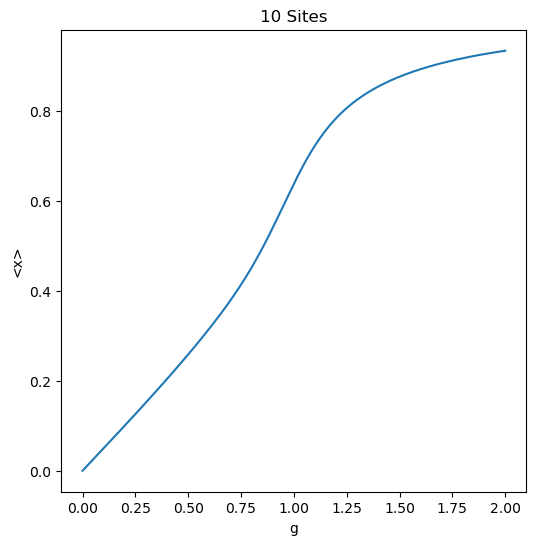

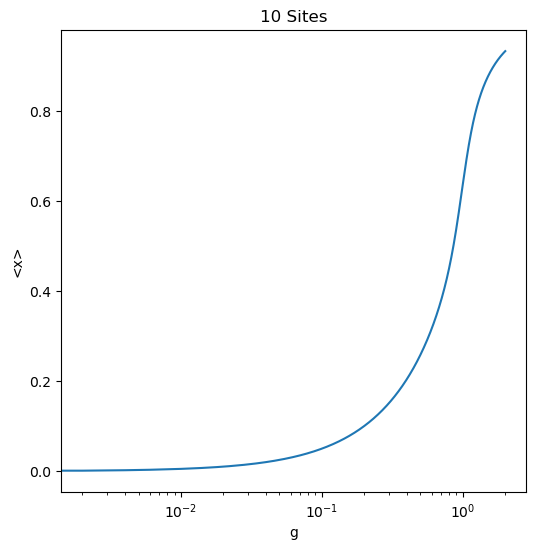

In [23]:
# Construct Hamiltonians for different values of g
gs = np.linspace(0, 2, 1000)

Sx_expectations = np.array([])
for g in gs:
    H = ising_hamiltonian(g, 12)
    evals, evecs = sp.sparse.linalg.eigsh(H, k=1, which="SA")
    Sx_expectations = np.append(Sx_expectations, Sx(evecs[:, 0], 12))

plt.figure(figsize=(6, 6))
plt.plot(gs, Sx_expectations)
plt.title("10 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()

plt.figure(figsize=(6, 6))
plt.semilogx(gs, Sx_expectations)
plt.title("10 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()

In [ ]:
# Construct Hamiltonians for different values of g
gs = np.linspace(0, 2, 1000)

Sx_expectations = np.array([])
for g in gs:
    H = ising_hamiltonian(g, 15)
    evals, evecs = sp.sparse.linalg.eigsh(H, k=1, which="SA")
    Sx_expectations = np.append(Sx_expectations, Sx(evecs[:, 0], 15))

plt.figure(figsize=(6, 6))
plt.plot(gs, Sx_expectations)
plt.title("10 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()

plt.figure(figsize=(6, 6))
plt.semilogx(gs, Sx_expectations)
plt.title("10 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()